In [1]:
import tensorflow as tf                   # TensorFlow is a popular deep learning framework.
from keras.preprocessing.image import ImageDataGenerator # ImageDataGenerator generates augmented image data for training neural networks.
from tensorflow.keras.preprocessing import image # Module for loading and preprocessing images.
import numpy as np                        # NumPy is a library for numerical computations in Python.
import matplotlib.pyplot as plt          # Matplotlib is used for plotting and visualization.


In [2]:
# Data Preprocessing for Training Data
train_gen_data = ImageDataGenerator(
    rescale=1. / 255,         # Normalize pixel values to [0, 1]
    shear_range=0.2,         # Randomly apply shear transformations
    zoom_range=0.2,          # Randomly zoom images
    horizontal_flip=True     # Randomly flip images horizontally
)

In [3]:
# Load Training Data from Directory and Apply Data Augmentation
training_set = train_gen_data.flow_from_directory(
    r"/content/drive/MyDrive/collab data/processed_images/train",
    target_size=(64, 64),    # Resize images to (64, 64)
    batch_size=32,           # Number of samples per gradient update
    class_mode='binary'      # Binary classification task (two classes)
)

Found 491 images belonging to 2 classes.


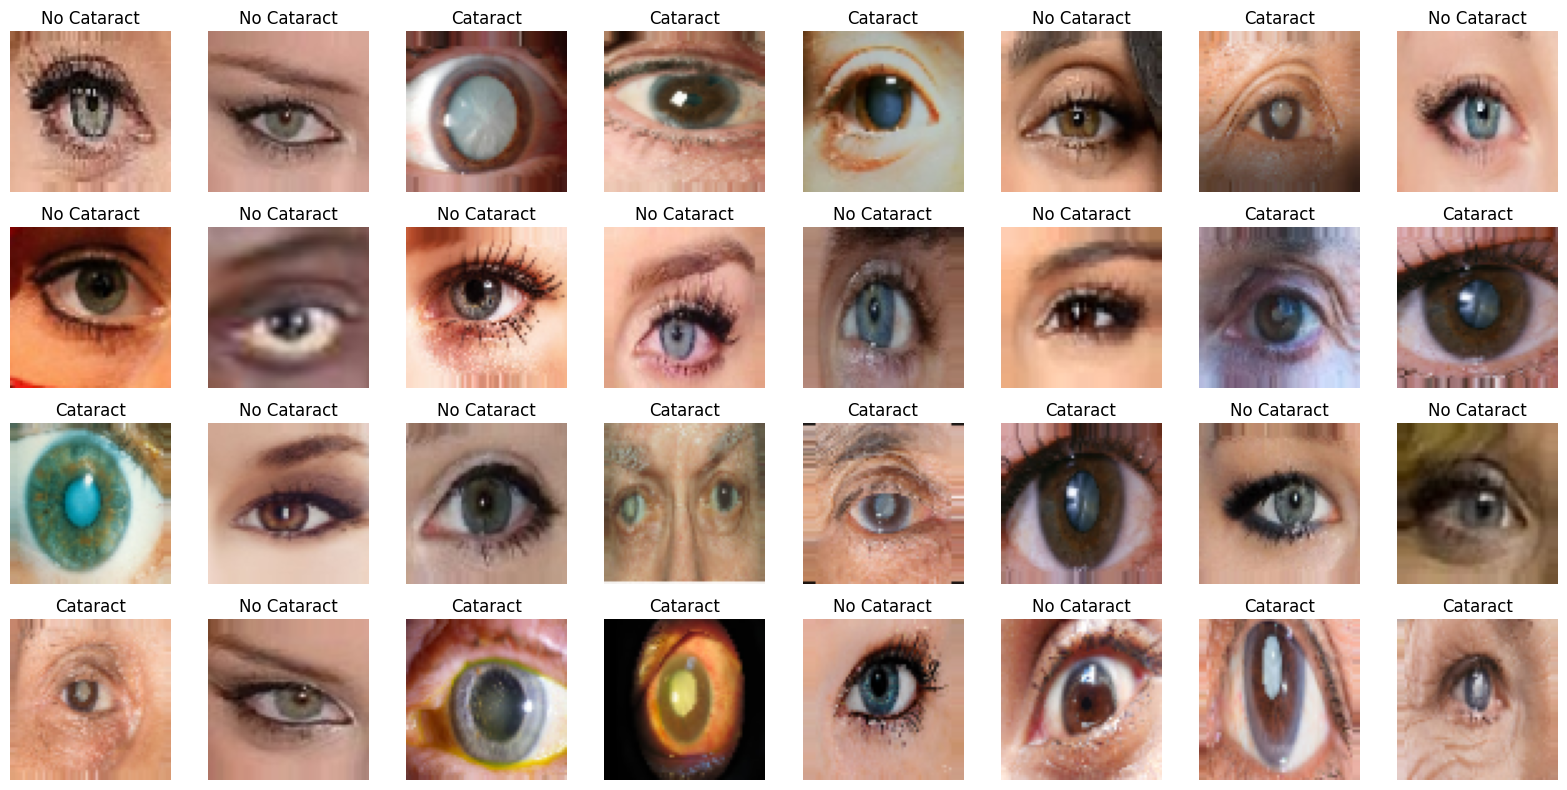

In [4]:
# Get a batch of images and corresponding labels from the training set
images, labels = next(training_set)
# 'training_set' is assumed to be an iterator that provides batches of images and labels during training.

# Function to display a grid of images
def plot_images(images, labels):
    # Create a grid of 4 rows and 8 columns to display the images
    fig, axes = plt.subplots(4, 8, figsize=(16, 8))
    # 'fig' is the overall figure object, and 'axes' is a 2D array of Axes objects to plot the images.

    # Flatten the 2D array of axes into a 1D array for easy iteration
    axes = axes.flatten()
    # This allows us to loop through each element in a linear fashion, accessing 32 (4x8) different axes.

    # Loop through each image in the batch
    for i in range(len(images)):
        # Display the image on the corresponding subplot (i-th position)
        axes[i].imshow(images[i])
        # Set the title of the subplot based on the label of the image
        axes[i].set_title("Cataract" if labels[i] == 0 else "No Cataract")
        # Turn off the axis labels for a cleaner display
        axes[i].axis('off')

    # Adjust the spacing between subplots for better visualization
    plt.tight_layout()

    # Display the grid of images
    plt.show()

# Display the batch of images from the training set using the defined function
plot_images(images, labels)
# This function call will visualize a 4x8 grid of images along with their corresponding labels.

In [5]:
# Data Preprocessing for Test Data
test_gen_data = ImageDataGenerator(rescale=1. / 255)  # Only rescale pixel values for test data

In [6]:
# Load Test Data from Directory
test_set = test_gen_data.flow_from_directory(
    r"/content/drive/MyDrive/collab data/processed_images/test",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 121 images belonging to 2 classes.


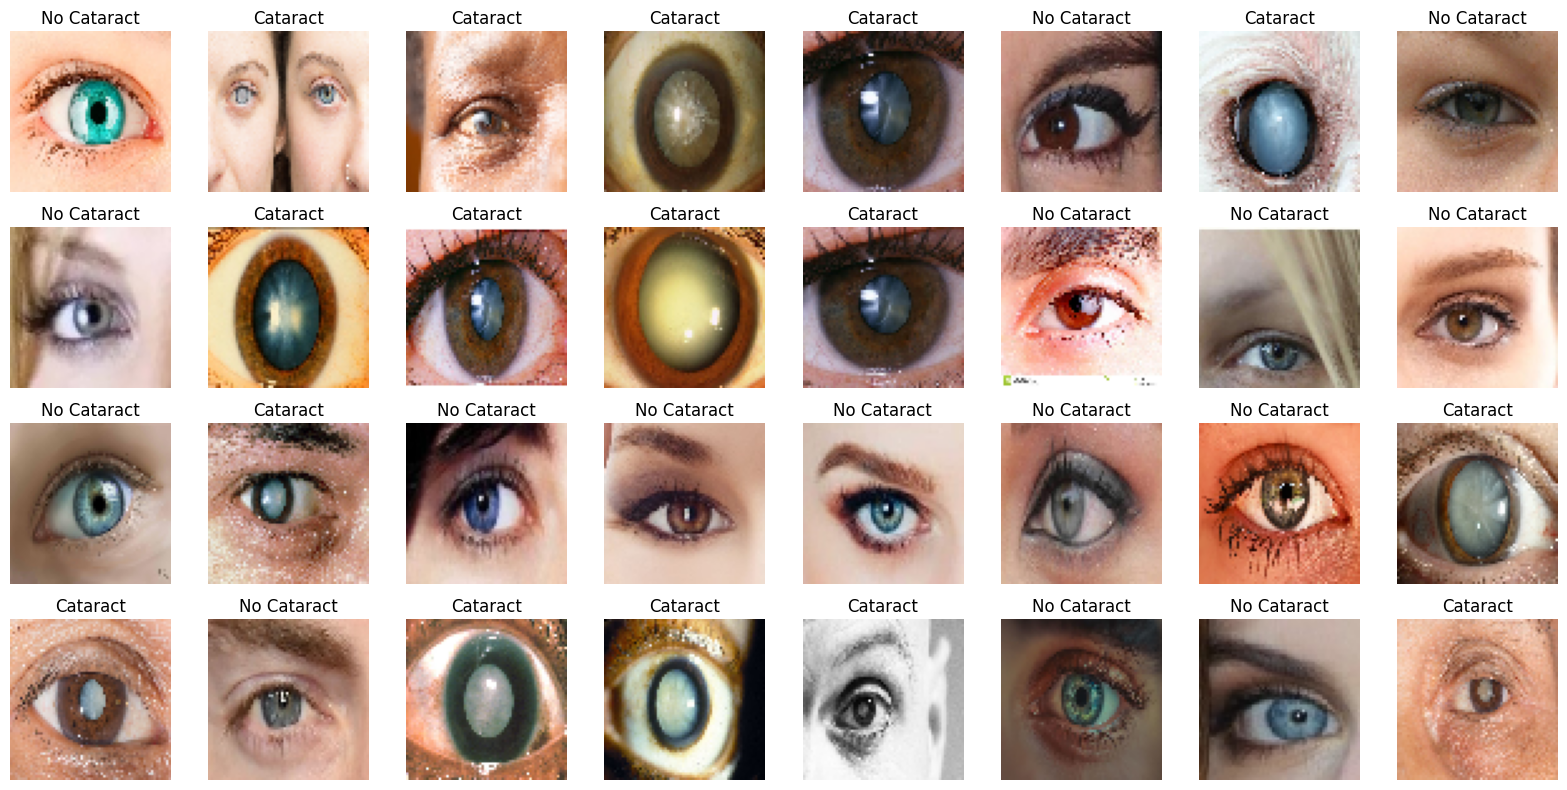

In [7]:
# Get a batch of images from the training set
images, labels = next(test_set)

# Function to display a grid of images
def plot_images(images, labels):
    fig, axes = plt.subplots(4, 8, figsize=(16, 8))
    axes = axes.flatten()
    for i in range(len(images)):
        axes[i].imshow(images[i])
        axes[i].set_title("Cataract" if labels[i] == 0 else "No Cataract")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Display the batch of images from the training set
plot_images(images, labels)

In [8]:
# Define the CNN Model Architecture
model = tf.keras.models.Sequential()

# Step 1: Convolutional Layer 1
# We use 32 filters of size 3x3, using the ReLU activation function
# The input shape is [64, 64, 3], representing an image of size 64x64 with 3 color channels (RGB)
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2: Max Pooling Layer 1
# We perform max pooling with a pool size of 2x2 and a stride of 2
# This helps in reducing the spatial dimensions of the feature maps and controlling overfitting
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3: Convolutional Layer 2
# We add another convolutional layer with 32 filters of size 3x3 and use the ReLU activation function
# The input shape is automatically inferred from the previous layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

# Step 4: Max Pooling Layer 2
# We perform max pooling again with the same settings as in the previous pooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 5: Flatten Layer
# We flatten the 2D feature maps into a 1D vector to prepare for the fully connected layers
model.add(tf.keras.layers.Flatten())

# Step 6: Fully Connected Layer 1
# We add a dense layer with 128 units and use the ReLU activation function
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 7: Output Layer
# We add the final dense layer with 1 unit and use the sigmoid activation function
# Since this is a binary classification problem, the output unit will predict the probability of the positive class (1)
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [9]:
# Compile the Model
# 'optimizer' specifies the optimization algorithm used during training. 'adam' is a popular optimizer that adapts learning rates and performs well for many tasks.
# 'loss' specifies the loss function that the model will try to minimize during training. 'binary_crossentropy' is commonly used for binary classification problems.
# 'metrics' is a list of evaluation metrics used to monitor the model's performance during training. In this case, we are using 'accuracy' to track how often predictions match the true labels.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Display Model Summary, the model.summary() method is often used to provide a concise overview of the architecture and parameters of the CNN model. This summary is particularly helpful for understanding the different layers and their output shapes in the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [11]:
# Train the Model on the Training Data
model.fit(x=training_set, validation_data=test_set, epochs=10)

Epoch 1/10
16/16 [==============================] - 31s 1s/step - loss: 0.6483 - accuracy: 0.6171 - val_loss: 0.5900 - val_accuracy: 0.5537
Epoch 2/10
16/16 [==============================] - 21s 1s/step - loss: 0.4983 - accuracy: 0.7597 - val_loss: 0.3853 - val_accuracy: 0.7934
Epoch 3/10
16/16 [==============================] - 21s 1s/step - loss: 0.4454 - accuracy: 0.7984 - val_loss: 0.3370 - val_accuracy: 0.8843
Epoch 4/10
16/16 [==============================] - 28s 2s/step - loss: 0.3571 - accuracy: 0.8391 - val_loss: 0.2651 - val_accuracy: 0.9091
Epoch 5/10
16/16 [==============================] - 21s 1s/step - loss: 0.3823 - accuracy: 0.8106 - val_loss: 0.3434 - val_accuracy: 0.8678
Epoch 6/10
16/16 [==============================] - 21s 1s/step - loss: 0.3200 - accuracy: 0.8554 - val_loss: 0.4564 - val_accuracy: 0.8182
Epoch 7/10
16/16 [==============================] - 21s 1s/step - loss: 0.3843 - accuracy: 0.8411 - val_loss: 0.3640 - val_accuracy: 0.8017
Epoch 8/10
16/16 [==

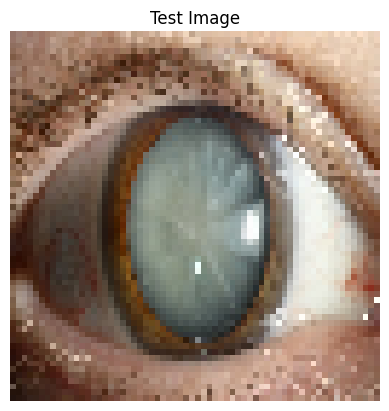

In [13]:
# Load a Test Image
test_image_path = r"/content/drive/MyDrive/collab data/processed_images/test/cataract/image_249.png"
test_image = image.load_img(test_image_path, target_size=(64, 64))
test_image_array = image.img_to_array(test_image)

# Display the Test Image
plt.imshow(test_image_array.astype('uint8'))
plt.title("Test Image")
plt.axis('off')
plt.show()

In [29]:
# Load a Test Image and Perform Prediction
test_image = image.load_img(r"/content/drive/MyDrive/collab data/processed_images/test/cataract/image_249.png",
                            target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

1/1 [==============================] - 0s 24ms/step


In [30]:
# Get the Prediction Label
if result[0][0] == 1:
    prediction = 'No Cataract Found!'
elif result[0][0] == 0:
    prediction = 'Cataract Confirmed!'
else:
    prediction = 'Not a valid image of an eye.'

print(prediction)

Cataract Confirmed!


In [17]:
model.save('cataract_disease_model_CNN.h5')

In [27]:
# Load the pre-trained model
model = tf.keras.models.load_model('cataract_disease_model_CNN.h5')

# Load a Test Image and Perform Prediction
test_image = image.load_img(r"/content/drive/MyDrive/collab data/processed_images/test/normal/image_254.png",
                            target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

# Get the Prediction Label
if result[0][0] == 1:
    prediction = 'No Cataract Found!'
elif result[0][0] == 0:
    prediction = 'Cataract Confirmed!'
else:
    prediction = 'Not a valid image of an eye.'

print(prediction)

1/1 [==============================] - 0s 61ms/step
No Cataract Found!
